In [97]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [98]:
name = 'NVDA'
ticker = yf.Ticker(name)
historicals = ticker.history(start='2025-01-01', end='2025-12-31')
historicals.drop(inplace=True, columns=['Dividends', 'Stock Splits'])
historicals

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02 00:00:00-05:00,135.962805,138.842022,134.593185,138.272171,198247200
2025-01-03 00:00:00-05:00,139.971709,144.860371,139.691787,144.430496,229322500
2025-01-06 00:00:00-05:00,148.549363,152.118394,147.779585,149.389130,265377400
2025-01-07 00:00:00-05:00,152.988143,153.088122,139.971700,140.101669,351782200
2025-01-08 00:00:00-05:00,142.541012,143.910632,137.522380,140.071686,227349900
...,...,...,...,...,...
2025-12-23 00:00:00-05:00,182.970001,189.330002,182.899994,189.210007,174873600
2025-12-24 00:00:00-05:00,187.940002,188.910004,186.589996,188.610001,65528500
2025-12-26 00:00:00-05:00,189.919998,192.690002,188.000000,190.529999,139740300


In [99]:
historicals.loc['2025-01']['High'].max()

np.float64(153.08812187242287)

In [100]:
historicals.loc['2025-01': '2025-02']['Close']

Date
2025-01-02 00:00:00-05:00    138.272171
2025-01-03 00:00:00-05:00    144.430496
2025-01-06 00:00:00-05:00    149.389130
2025-01-07 00:00:00-05:00    140.101669
2025-01-08 00:00:00-05:00    140.071686
2025-01-10 00:00:00-05:00    135.872849
2025-01-13 00:00:00-05:00    133.193573
2025-01-14 00:00:00-05:00    131.723953
2025-01-15 00:00:00-05:00    136.202759
2025-01-16 00:00:00-05:00    133.533493
2025-01-17 00:00:00-05:00    137.672348
2025-01-21 00:00:00-05:00    140.791489
2025-01-22 00:00:00-05:00    147.029800
2025-01-23 00:00:00-05:00    147.179749
2025-01-24 00:00:00-05:00    142.580994
2025-01-27 00:00:00-05:00    118.387611
2025-01-28 00:00:00-05:00    128.954727
2025-01-29 00:00:00-05:00    123.666168
2025-01-30 00:00:00-05:00    124.615921
2025-01-31 00:00:00-05:00    120.037170
2025-02-03 00:00:00-05:00    116.628105
2025-02-04 00:00:00-05:00    118.617554
2025-02-05 00:00:00-05:00    124.795868
2025-02-06 00:00:00-05:00    128.644806
2025-02-07 00:00:00-05:00    129.80

In [101]:
historicals.loc['2025-01': '2025-02']['Close'].mean()

np.float64(133.07103885748447)

In [112]:
highs = historicals['High'].resample('W').max()
highs.head()

Date
2025-01-05 00:00:00-05:00    144.860371
2025-01-12 00:00:00-05:00    153.088122
2025-01-19 00:00:00-05:00    138.712070
2025-01-26 00:00:00-05:00    148.929263
2025-02-02 00:00:00-05:00    128.964719
Freq: W-SUN, Name: High, dtype: float64

<Axes: xlabel='Date'>

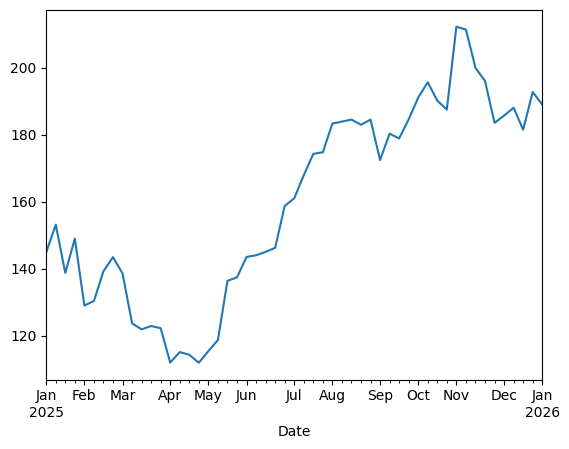

In [115]:
highs.plot()

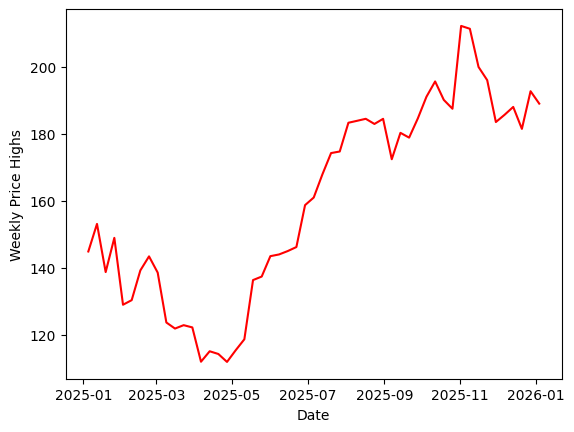

In [114]:
plt.plot(highs.index, highs.values, color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Price Highs')
plt.show()

In [116]:
historicals.resample('W').agg({
    'High': 'max',
    'Low': 'min',
    'Close': 'mean',
    'Volume': 'sum'
})

,High,Low,Close,Volume
Date,,,,
2025-01-05 00:00:00-05:00,144.860371,134.593185,141.351334,427569700
2025-01-12 00:00:00-05:00,153.088122,134.183308,141.358833,1052112000
2025-01-19 00:00:00-05:00,138.712070,129.474589,134.465225,996041100
2025-01-26 00:00:00-05:00,148.929263,137.052506,144.395508,825973500
2025-02-02 00:00:00-05:00,128.964719,116.218206,123.132320,2646704500
2025-02-09 00:00:00-05:00,130.334328,112.979102,123.698161,1369686400
2025-02-16 00:00:00-05:00,139.211911,129.044722,134.293274,949079700
2025-02-23 00:00:00-05:00,143.400781,133.993350,138.254681,758833800
2025-03-02 00:00:00-05:00,138.552111,116.368174,126.617372,1677630500
